In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/allorbs.csv')

In [3]:
df_in = df[df['inout'] == 'i']

In [92]:
orbs = 20
mincount = 10

In [93]:
mino = df_in['orbit'].min()
orange = mino+orbs

df_in_test = df_in[(df_in['orbit']>=mino)&(df_in['orbit']<orange)].copy().sort_values('alt_temp')

In [104]:
bins = np.arange(95,230,2)
bin_mids = (bins[1:]+bins[:-1])/2.
df_in_test['bin'] = pd.cut(df_in_test['alt_temp'],bins,labels=bin_mids)
test_mean = df_in_test[['temp','bin']].groupby('bin').mean()
test_std = df_in_test[['temp','bin']].groupby('bin').std()
test_count = df_in_test[['temp','bin']].groupby('bin').count().rename(columns={'temp':'temp_count'})
bindf = pd.merge(test_mean.reset_index(),test_std.reset_index(),on='bin',suffixes=['_mean','_std'])
bindf = pd.merge(bindf,test_count.reset_index(),on='bin')
bindf_res = bindf[bindf['temp_count']>=mincount]

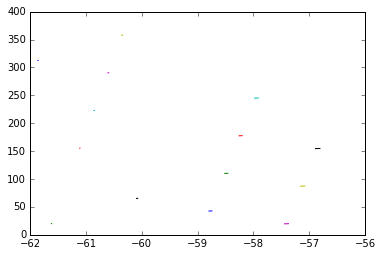

In [105]:
plt.figure()
for orb,orbg in df_in_test.groupby('orbit'):
    orbdf = orbg.sort_values('alt_temp')
    plt.plot(orbdf['lat'],orbdf['lon'],label=orb)
    
plt.show()

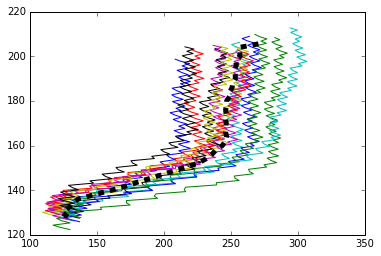

In [106]:
plt.figure()
for orb,orbg in df_in_test.groupby('orbit'):
    orbdf = orbg.sort_values('alt_temp')
    plt.plot(orbdf['temp'],orbdf['alt_temp'],label=orb)
    
plt.plot(bindf_res['temp_mean'],bindf_res['bin'],'k--',lw=5)
plt.show()

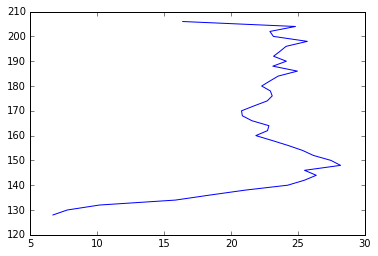

In [107]:
plt.figure()
plt.plot(bindf_res['temp_std'],bindf_res['bin'])
plt.show()

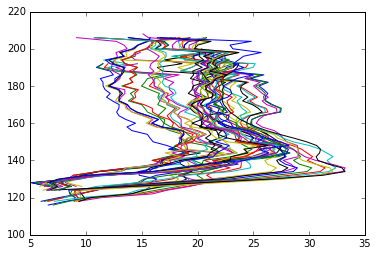

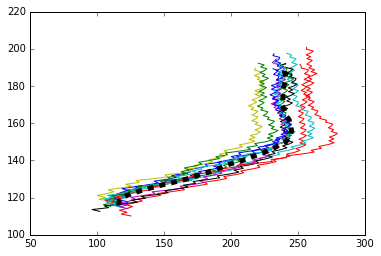

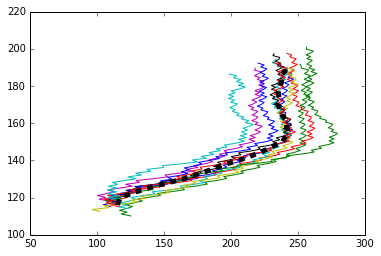

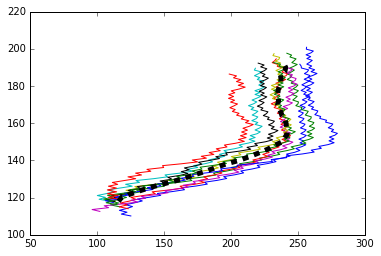

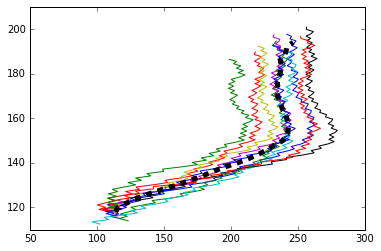

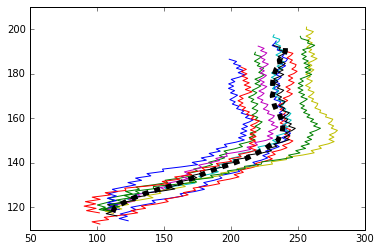

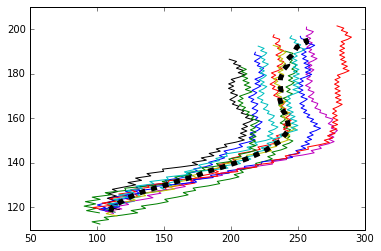

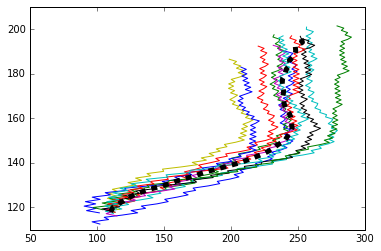

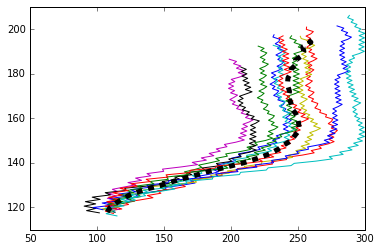

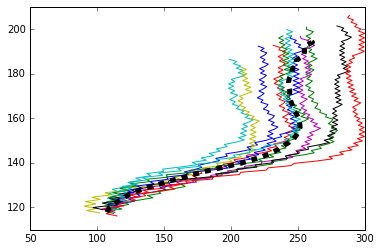

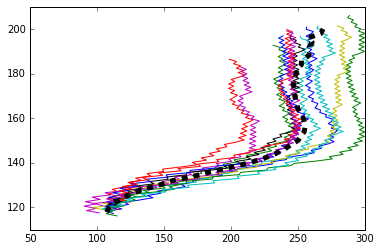

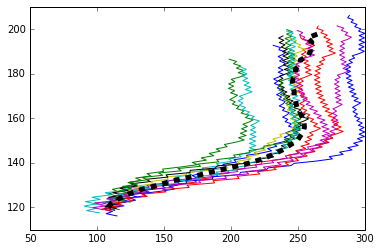

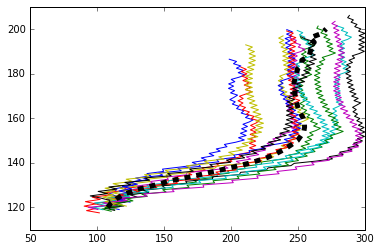

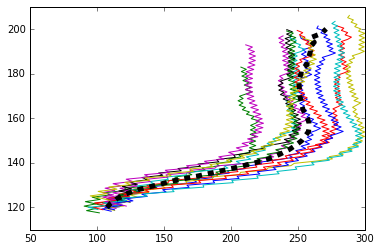

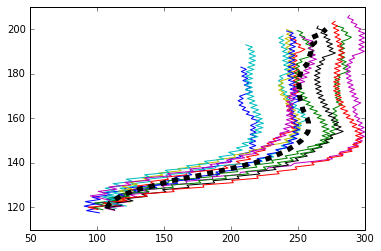

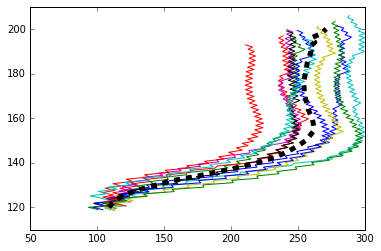

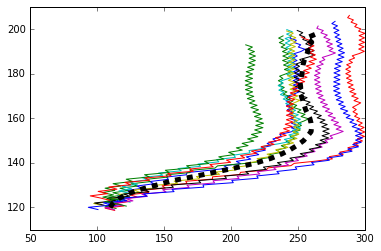

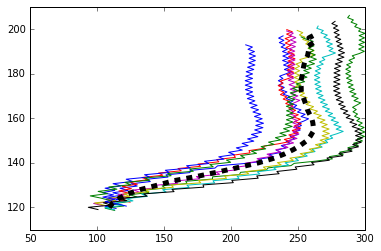

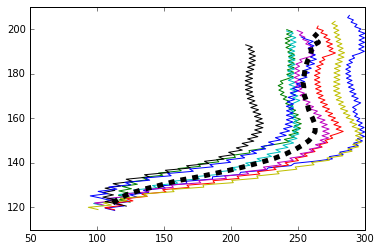

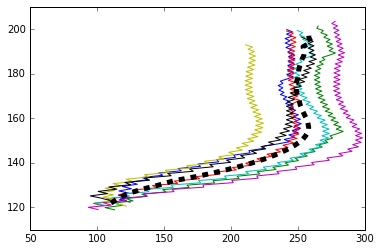

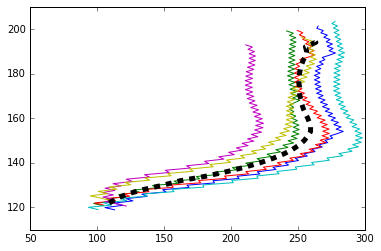

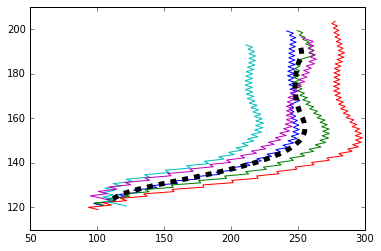

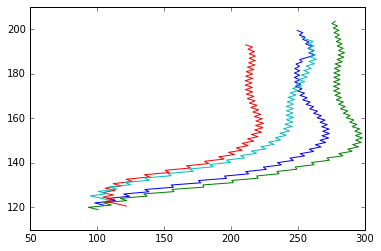

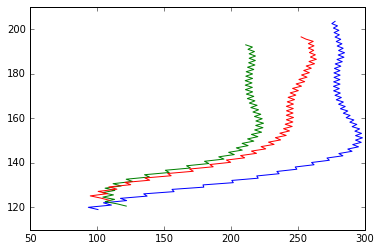

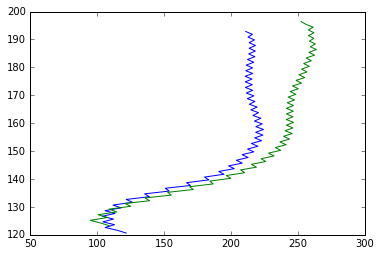

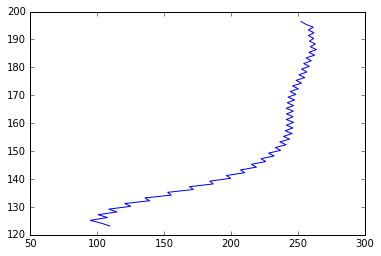

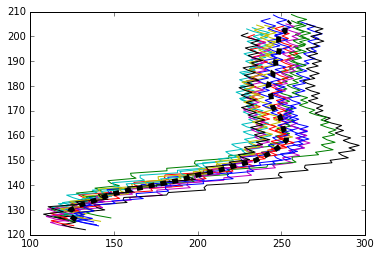

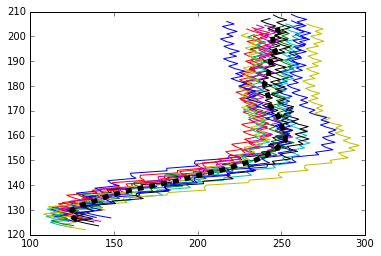

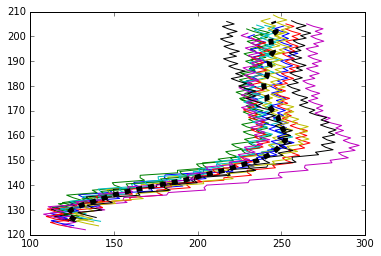

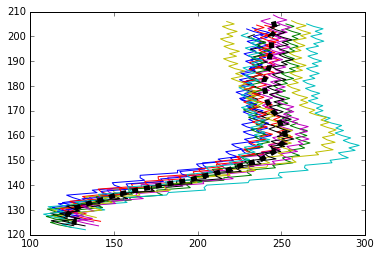

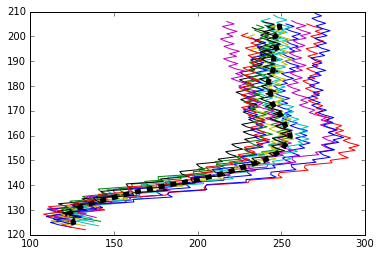

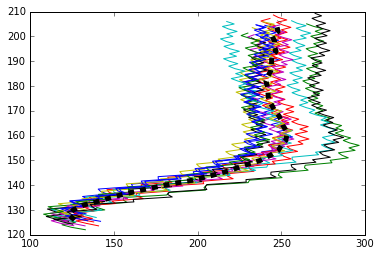

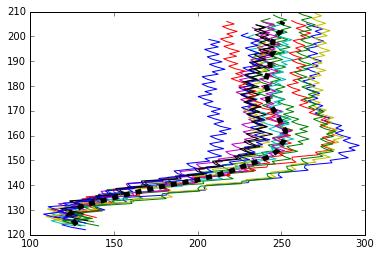

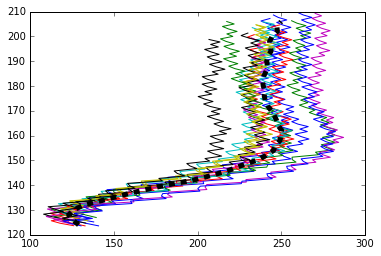

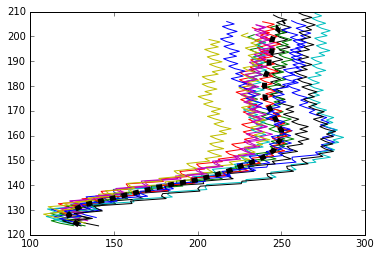

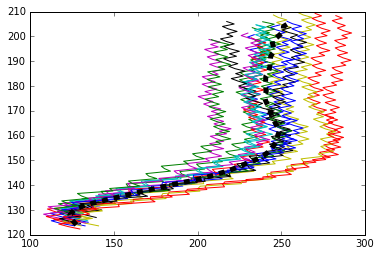

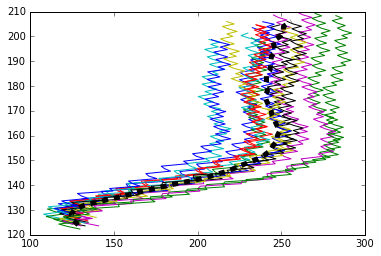

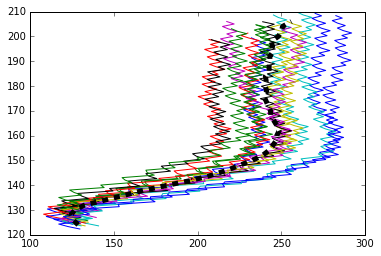

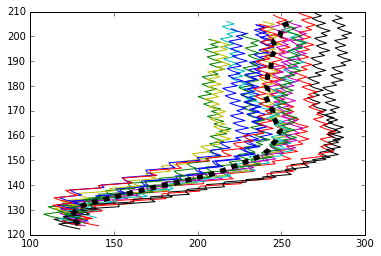

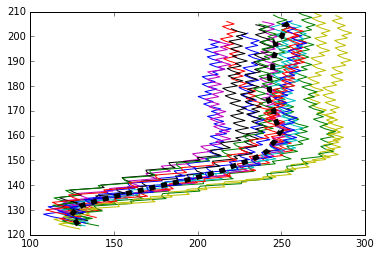

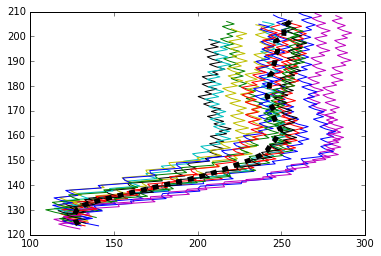

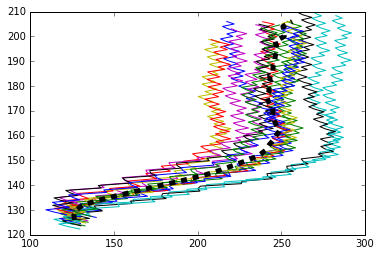

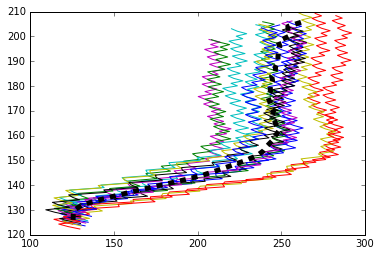

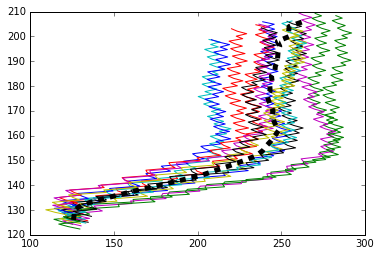

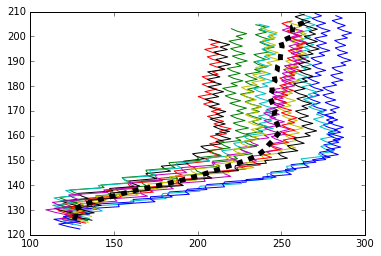

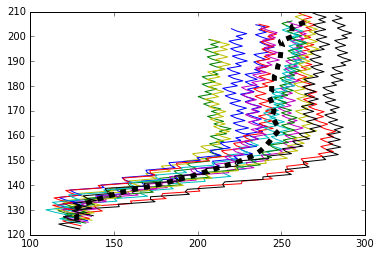

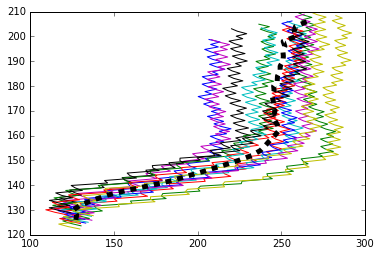

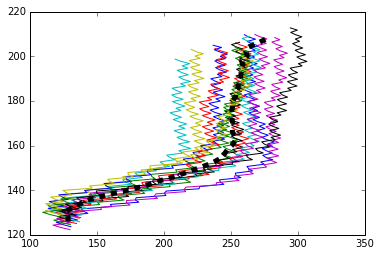

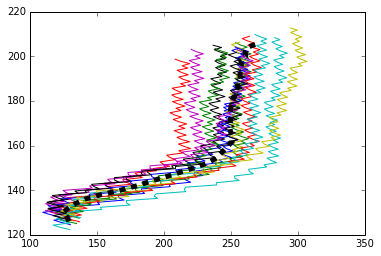

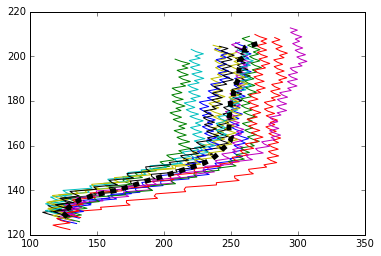

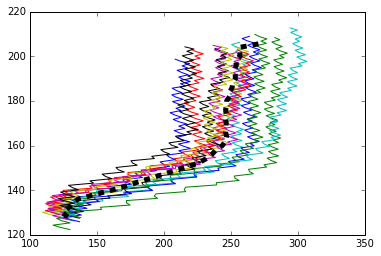

In [108]:
sfig, sax = plt.subplots()
for orb in df_in.sort_values('orbit')['orbit'].unique()[0:50]:
    orange = orb + orbs
    df_in_test = df_in[(df_in['orbit']>=orb)&(df_in['orbit']<orange)].copy().sort_values('alt_temp')
    df_in_test['bin'] = pd.cut(df_in_test['alt_temp'],bins,labels=bin_mids)
    test_mean = df_in_test[['temp','bin']].groupby('bin').mean()
    test_std = df_in_test[['temp','bin']].groupby('bin').std()
    test_count = df_in_test[['temp','bin']].groupby('bin').count().rename(columns={'temp':'temp_count'})
    bindf = pd.merge(test_mean.reset_index(),test_std.reset_index(),on='bin',suffixes=['_mean','_std'])
    bindf = pd.merge(bindf,test_count.reset_index(),on='bin')
    bindf_res = bindf[bindf['temp_count']>=mincount]
    tfig, tax = plt.subplots()
    for orb,orbg in df_in_test.groupby('orbit'):
        orbdf = orbg.sort_values('alt_temp')
        tax.plot(orbdf['temp'],orbdf['alt_temp'],label=orb)

    tax.plot(bindf_res['temp_mean'],bindf_res['bin'],'k--',lw=5)
    #plt.show()
    
    
    sax.plot(bindf_res['temp_std'],bindf_res['bin'])
plt.show()
    